# Homework #1   Due date: 27 October 2022, 11:59 PM

## Q1) One feature regression for Boston data. 
Choose one of the features in Boston data, try to select one that is mostly correlated (or inversely correlated) with the target. Fit a line with linear regression (you can use built-in LinearRegression() method). What is the equation of the fitting line? Please plot your data points (chosen feature vs. target) and plot your fitting line on it.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [14]:
data = datasets.load_boston()  #load dataset

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

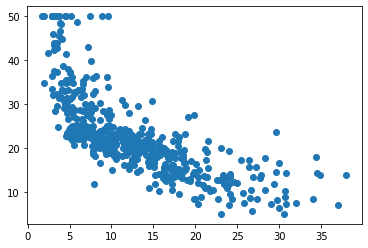

In [13]:
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])
lstat = housing_df["LSTAT"]  #select 'LSTAT' for feature
target = data["target"]
pyplot.scatter(lstat, target, marker = "o")  # puts the points

In [11]:
lr = LinearRegression()
X = housing_df[['LSTAT']]
y = housing_df['target']
lr.fit(X,y)
print(lr.score(X,y))


0.5441462975864797


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


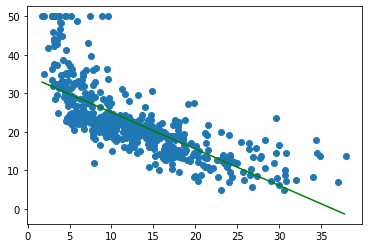

In [15]:
f = lambda x: lr.coef_[0] * x + lr.intercept_  #equation of the fitting line
steps = list(np.arange(min(lstat),max(lstat),.25))   # x-coordinate
fitline = list(map(f, steps))       # y-coordinate
pyplot.plot(steps, fitline, color='green')  #it just plots the line
pyplot.scatter(lstat, target)    # puts the points

## Q2) Another metric for performance evaluation
We have seen that LinearRegression() by *sklearn* provides a method called *score* which outputs a value with a maximum of 1 (the larger the better), which is good to evaluate the performance. 
Another common performance metric is mean sum of squared error (MSE):

$$\frac{1}{m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Please implement this metric and compute it when Boston data with all features are used. lr.score gave 0.74. What is the MSE?

Important restriction: Do NOT use *mean_squared_error* module from *sklearn.metrics*.

In [16]:
def mse(y_pred, y_true):   #calculate mean square error 
  return np.sum((y_pred - y_true) * (y_pred - y_true))/(len(y_pred))



In [17]:
lr_mse = LinearRegression()
X_mse = data['data']   #all features
y_mse =  data['target']
lr_mse.fit(X_mse,y_mse)
X_mse_predict = lr_mse.predict(X_mse) #Predictions must be made before the mean square error is calculated.
print(mse(X_mse_predict, y_mse))

21.894831181729202


## Q3) Splitting the dataset
In the lecture we did training and evaluation (score) on the whole Boston dataset. This is bad. Use the code in Week 1 Python Notebook to:
- shuffle the data,
- select 60% of the data as a training set (do the line fitting), 40% as a test set,
- what is the score on the test data?
- what is the mean squared error?

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data['data'], data['target'], random_state=0, train_size=0.6, test_size=0.4)  #shuflling the data

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (303, 13)
y_train shape: (303,)
X_test shape: (203, 13)
y_test shape: (203,)


In [19]:
lr_shuffle = LinearRegression()
lr_shuffle.fit(X_train, y_train)

LinearRegression()

In [20]:
print(lr_shuffle.score(X_test,y_test))

0.688260714253802


In [22]:
y_test_pred = lr_shuffle.predict(X_test)
print(mse(y_test_pred, y_test))

25.790362150702443
